# Telecom Churn Study

The objective of this study is to analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

This study is only to focused on the High value customers(HVCs), which constitutes the top 30 percent of high spending customers

we are to build two different types of models:
- The predictive model, ie. the one having more accuracy and less bias. For this we'll be using techniques like PCA for dimensionality reduction.
- The interpretive model, in which the focus would be on identifying the features which could give us the principle features which cause a customer to churn

## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.decomposition import PCA,IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

### Defining the constants

In [2]:
colors = ["#42a4f5", "#c3c7c9"]
STATE = 100

### Importing and identifying the characteristics of the Data

In [3]:
df = pd.read_csv('telecom_churn_data.csv')

In [4]:
df.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

# Data Preparation

We can eliminate the following columns straight away:
- last_date_of_month_6
- last_date_of_month_7
- last_date_of_month_8
- last_date_of_month_9


In [6]:
df = df.drop(labels=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9'],axis=1)

### Missing value treatment
#### Dorping the rows which are more than 40% empty and the columns which are more than 60% empty

In [7]:
df = df.dropna(thresh=df.shape[0]*0.6,how='all',axis=1)

In [8]:
df = df.dropna(thresh=df.shape[1]*0.4,how='all',axis=0)

### Imputing the missing values

In [9]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98981 entries, 0 to 99998
Data columns (total 182 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mobile_number        98981 non-null  int64  
 1   circle_id            98981 non-null  int64  
 2   loc_og_t2o_mou       98981 non-null  float64
 3   std_og_t2o_mou       98981 non-null  float64
 4   loc_ic_t2o_mou       98981 non-null  float64
 5   arpu_6               98981 non-null  float64
 6   arpu_7               98981 non-null  float64
 7   arpu_8               98981 non-null  float64
 8   arpu_9               98981 non-null  float64
 9   onnet_mou_6          96062 non-null  float64
 10  onnet_mou_7          96140 non-null  float64
 11  onnet_mou_8          94621 non-null  float64
 12  onnet_mou_9          92254 non-null  float64
 13  offnet_mou_6         96062 non-null  float64
 14  offnet_mou_7         96140 non-null  float64
 15  offnet_mou_8         94621 non-null

#### Identifing High Value Customers

In [10]:
# Scoping our sample and keeping only the High valued customers (top 30%) ie. who demonstrated high spending in the initial two months
# creating our target value indicator "churn", based on business logics 
df['total_rech_amt_good_phase'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2
total_recharge_amount_good_phase_cutoff = df['total_rech_amt_good_phase'].quantile(0.7)
df = df[df['total_rech_amt_good_phase'] > total_recharge_amount_good_phase_cutoff]

# dropping the derrived column "total_rech_amt_good_phase"
df = df.drop(['total_rech_amt_good_phase'],axis=1)

## Data Cleaning

In [11]:
# derriving a variable for total overall usage in 9th month
df['total_overall_usage'] = df['total_og_mou_9'] + df['total_ic_mou_9'] + df['vol_2g_mb_9'] + df['vol_3g_mb_9']
df['churn'] = np.where(df['total_overall_usage']== 0, 1, 0)
df['churn'].value_counts()

# dropping the arbitary/derrived column "total_overall_usage"
df = df.drop(['total_overall_usage'],axis=1)

In [12]:
 df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29694 entries, 7 to 99988
Data columns (total 183 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mobile_number        29694 non-null  int64  
 1   circle_id            29694 non-null  int64  
 2   loc_og_t2o_mou       29694 non-null  float64
 3   std_og_t2o_mou       29694 non-null  float64
 4   loc_ic_t2o_mou       29694 non-null  float64
 5   arpu_6               29694 non-null  float64
 6   arpu_7               29694 non-null  float64
 7   arpu_8               29694 non-null  float64
 8   arpu_9               29694 non-null  float64
 9   onnet_mou_6          29493 non-null  float64
 10  onnet_mou_7          29506 non-null  float64
 11  onnet_mou_8          28873 non-null  float64
 12  onnet_mou_9          28113 non-null  float64
 13  offnet_mou_6         29493 non-null  float64
 14  offnet_mou_7         29506 non-null  float64
 15  offnet_mou_8         28873 non-null

In [13]:
# As per the analysis scope dropping all the variables of the 9th month, 
# since we have already derrived a chrun variable for the end prediction analysis
ninth_month_columns = [col for col in df.columns if ('_9' in col or 'sep_' in col)]
df = df.drop(ninth_month_columns, axis=1)

In [14]:
df.shape

(29694, 139)

In [15]:
df1=df
df1.shape

(29694, 139)

#### Derriving the rate of churn

In [16]:
 rate_of_churn = round((len(df[df.churn == 1]) / len(df)) * 100, ndigits=2)
rate_of_churn 

8.51

<b> ie. 8.51% customers churn in the 9th month (as per the trends)</b>
### Eliminating Columns with zero variance

In [17]:
# Finding all columns that have unique values, ie. have exactly zero variance
zero_variance_columns = []
for col in df.columns:
    if len(df[col].value_counts()) == 1:
        zero_variance_columns.append(col)
# Dropping all columns that have unique values, ie. have exactly zero variance
df = df.drop(zero_variance_columns,axis=1)

In [18]:
df.shape

(29694, 129)

### Null value Treatment

In [19]:
def null_value_stats():
    print("No. of columns containing null values")
    print(len(df.columns[df.isna().any()]))

    print("No. of columns not containing null values")
    print(len(df.columns[df.notna().all()]))

    print("Total no. of columns in the dataframe")
    print(len(df.columns))

    # getting the columns that still have null values
    nan_cols = [i for i in df.columns if df[i].isnull().any()]
    return nan_cols

    
null_value_stats()

No. of columns containing null values
84
No. of columns not containing null values
45
Total no. of columns in the dataframe
129


['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou

### Missing value imputation 

In [20]:
fields_to_be_imputed = ['date_of_last_rech']

for field in fields_to_be_imputed:
    for month in ['6', '7', '8']:
        fields_to_be_imputed = field + '_' + month
        df[fields_to_be_imputed].fillna(df[fields_to_be_imputed].mode()[0], inplace=True)


null_value_stats()

No. of columns containing null values
81
No. of columns not containing null values
48
Total no. of columns in the dataframe
129


['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou

In [21]:
# instead of date of last recharge, we should consider day of recharge
df['date_of_last_rech_6'] = pd.to_datetime(df.date_of_last_rech_6).dt.day
df['date_of_last_rech_7'] = pd.to_datetime(df.date_of_last_rech_7).dt.day
df['date_of_last_rech_8'] = pd.to_datetime(df.date_of_last_rech_8).dt.day

### Imputing missing observations with Median column value

In [22]:
missing_cols = df.columns[df.isnull().sum()>0]
for col in missing_cols:
    df[col].fillna((df[col].median()), inplace=True)

null_value_stats()
df.shape

No. of columns containing null values
0
No. of columns not containing null values
129
Total no. of columns in the dataframe
129


(29694, 129)

#### Hence all the missing values have been taken care of, therefore we can move towards data analysis

# EDA

## Searching and treating outliers

In [23]:
df.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
count,2.969400e+04,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,...,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000
mean,7.001223e+09,588.984226,591.610585,537.473124,299.228691,307.475407,272.576190,422.957406,428.895909,384.855237,...,0.182798,0.171853,0.138378,0.150030,0.140803,1266.020846,129.655153,135.054904,121.279641,0.085101
std,6.845975e+05,443.251063,464.048634,493.599673,462.034359,483.041870,466.906501,470.709239,486.811567,475.211017,...,0.619070,0.582356,0.873010,0.952455,0.974437,975.802543,391.362611,407.968583,389.937424,0.279037
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
1%,7.000028e+09,19.235800,32.731100,0.000000,0.000000,0.000000,0.000000,1.048600,1.058600,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,189.000000,0.000000,0.000000,0.000000,0.000000
10%,7.000269e+09,272.070300,276.389400,137.353600,12.146000,11.666000,6.866000,58.583000,59.580000,35.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,294.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000642e+09,365.491750,367.184750,292.576250,43.410000,43.280000,33.960000,142.850000,141.282500,111.780000,...,0.000000,0.000000,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001233e+09,497.510000,495.966000,454.528000,129.040000,128.640000,106.810000,287.110000,287.085000,253.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,918.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001815e+09,705.839000,703.139750,673.782000,356.532500,363.605000,300.807500,527.037500,536.505000,486.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1931.000000,1.572500,1.950000,0.000000,0.000000
90%,7.002167e+09,995.698000,998.027600,988.560600,798.959000,829.160000,728.916000,920.566000,938.515000,858.431000,...,1.000000,1.000000,0.000000,0.000000,0.000000,2847.000000,440.003000,454.604000,394.291000,0.000000


In [24]:
cont_cols = [col for col in df.columns if col not in ['churn','mobile_number']]

for col in cont_cols:
    percentiles = df[col].quantile([0.01,0.99]).values
    df[col][df[col] <= percentiles[0]] = percentiles[0]
    df[col][df[col] >= percentiles[1]] = percentiles[1]
    
df.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
count,2.969400e+04,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,...,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000
mean,7.001223e+09,579.531124,582.079842,526.938896,290.533189,298.156335,263.243111,415.174645,420.322056,374.928745,...,0.170674,0.162322,0.100795,0.103624,0.094396,1265.316360,120.588075,125.980660,112.053045,0.085101
std,6.845975e+05,336.062761,338.160992,371.087700,406.178566,420.985562,400.093864,421.809085,431.077348,402.941138,...,0.517079,0.503970,0.428631,0.443643,0.431882,973.742018,318.921932,337.096425,312.711926,0.279037
min,7.000000e+09,19.235800,32.731100,0.000000,0.000000,0.000000,0.000000,1.048600,1.058600,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,189.000000,0.000000,0.000000,0.000000,0.000000
1%,7.000028e+09,19.239706,32.748677,0.000000,0.000000,0.000000,0.000000,1.049902,1.059902,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,189.000000,0.000000,0.000000,0.000000,0.000000
10%,7.000269e+09,272.070300,276.389400,137.353600,12.146000,11.666000,6.866000,58.583000,59.580000,35.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,294.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000642e+09,365.491750,367.184750,292.576250,43.410000,43.280000,33.960000,142.850000,141.282500,111.780000,...,0.000000,0.000000,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001233e+09,497.510000,495.966000,454.528000,129.040000,128.640000,106.810000,287.110000,287.085000,253.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,918.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001815e+09,705.839000,703.139750,673.782000,356.532500,363.605000,300.807500,527.037500,536.505000,486.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1931.000000,1.572500,1.950000,0.000000,0.000000
90%,7.002167e+09,995.698000,998.027600,988.560600,798.959000,829.160000,728.916000,920.566000,938.515000,858.431000,...,1.000000,1.000000,0.000000,0.000000,0.000000,2847.000000,440.003000,454.604000,394.291000,0.000000


Creating derived colums
- Average values of 3 months for each attributes were created to check if that value could address all the months.
- Median value of Internet usage (2G + 3G) across months was created to capture the churn rate as it was observed majority of the churn happens when the internet usage pattern shows a decline
- The AON variable was used to create tenure buckets. It was observed larger the tenure, lesser was the churn - as customers who are newly acquired to the network churned more as compared to the old customers.

In [25]:
df['int_usage_median'] = df[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']].median(axis=1)
df['int_usage_median'] = df.int_usage_median.map(lambda x: 1 if x == 0 else 0)
df = df.drop(['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'], 1)


df['tenure_buck'] = np.round(df['aon']/365,1)
bins = [0, 1, 2, 3, 4, 10]
df['tenure_buck'] = pd.cut(df['tenure_buck'], bins)
df['tenure_buck'].value_counts()

(4, 10]    9614
(1, 2]     7394
(0, 1]     5264
(2, 3]     4484
(3, 4]     2938
Name: tenure_buck, dtype: int64

## Correlation Analysis

In [26]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop

df = df.drop(to_drop, axis=1)
df.tenure_buck.dtype

CategoricalDtype(categories=[(0, 1], (1, 2], (2, 3], (3, 4], (4, 10]],
              ordered=True)

In [27]:
#create dummy for tenure_buck 
df = pd.get_dummies(df, drop_first=True)

df.rename(columns={"tenure_buck_(1, 2]": "tenure_buck_1_to_2","tenure_buck_(2, 3]":"tenure_buck_2_to_3",
                   "tenure_buck_(3, 4]":"tenure_buck_3_to_4",
                   "tenure_buck_(4, 10]":"tenure_buck_4_to_10"}, inplace=True)

In [28]:
df.shape

(29694, 73)

In [29]:
# After outlier treatment droping column which don't have much variance or zero variance
df = df.drop(['og_others_7','og_others_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','aon'], 1)

In [30]:
df.shape

(29694, 67)

### Visualizating the data for patterns

[Text(0, 0.5, '(%)')]

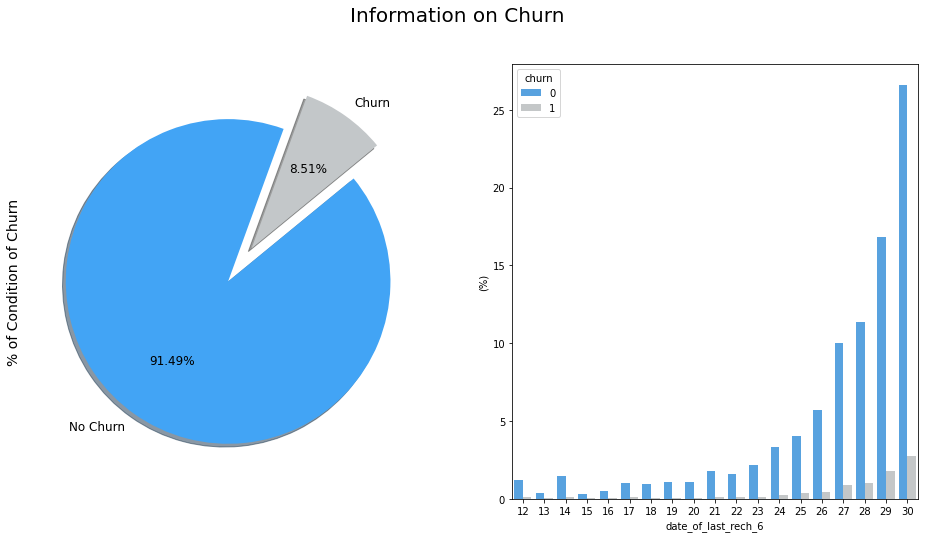

In [31]:
f, ax = plt.subplots(1,2, figsize=(16,8))


labels ="No Churn", "Churn"
plt.suptitle('Information on Churn', fontsize=20)

df["churn"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)
ax[0].set_ylabel('% of Condition of Churn', fontsize=14)


sns.barplot(x="date_of_last_rech_6", y="churn", hue="churn", data=df, palette=colors, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")

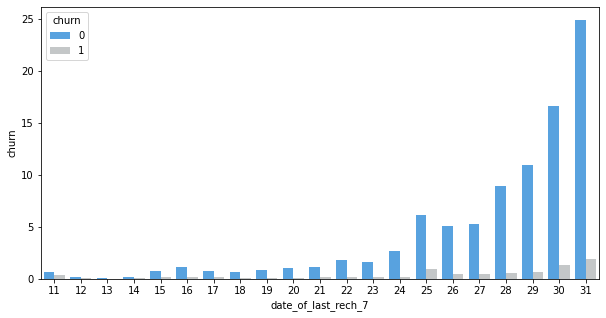

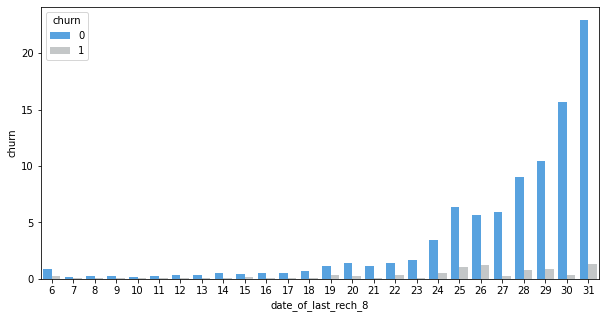

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x="date_of_last_rech_7", y="churn", hue="churn", data=df, palette=colors, 
            estimator=lambda x: len(x) / len(df) * 100)

plt.figure(figsize=(10,5))
sns.barplot(x="date_of_last_rech_8", y="churn", hue="churn", data=df, palette=colors, 
            estimator=lambda x: len(x) / len(df) * 100)

In [33]:
telecom_df = df
telecom_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,churn,int_usage_median,tenure_buck_1_to_2,tenure_buck_2_to_3,tenure_buck_3_to_4,tenure_buck_4_to_10
7,7000701601,1069.180,1349.8500,1989.59541,57.84,453.43,567.1600,16.23,33.49,31.64,...,0,0,0,57.74,1,1,0,1,0,0
8,7001524846,378.721,492.2230,137.36200,413.69,94.66,80.6300,0.00,0.00,0.00,...,0,0,0,21.03,0,0,0,0,0,0
13,7002191713,492.846,205.6710,593.26000,501.76,413.31,119.2800,23.53,144.24,72.11,...,0,0,0,0.00,0,1,0,0,0,1
16,7000875565,430.975,299.8690,187.89400,50.51,296.29,229.7400,0.00,2.83,0.00,...,0,0,0,0.00,0,1,1,0,0,0
17,7000187447,690.008,32.7311,25.49900,1185.91,61.64,1.0586,0.00,4.76,4.81,...,0,0,0,0.00,0,1,1,0,0,0


<b>Therefore after Exploratory Data Analysis, there are total 67 columns/characteristics left. We'll be now refining our intution further by modeling<b>

# Training Models

### Splitting Data into Training and Test Sets

In [34]:
# Putting feature variable to X
X = telecom_df.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = telecom_df.churn

# defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                                                                          
# normalizing all columns 
X_norm = X.apply(normalize) 
X_norm.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,loc_og_t2t_mou_6,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,int_usage_median,tenure_buck_1_to_2,tenure_buck_2_to_3,tenure_buck_3_to_4,tenure_buck_4_to_10
7,0.534073,0.669567,1.000000,0.026609,0.193806,0.234027,0.046339,0.113740,0.109152,0.047675,...,0.0,0.0,0.0,0.0,0.031680,1.0,0.0,1.0,0.0,0.0
8,0.182859,0.233586,0.069040,0.190316,0.040104,0.032895,0.000000,0.000000,0.000000,0.275648,...,0.0,0.0,0.0,0.0,0.011539,0.0,0.0,0.0,0.0,0.0
13,0.240910,0.087915,0.298181,0.230832,0.176618,0.048873,0.067182,0.489874,0.248766,0.046042,...,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,1.0
16,0.209438,0.135802,0.094438,0.023237,0.126485,0.094537,0.000000,0.009611,0.000000,0.039529,...,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,0.0,0.0,0.0
17,0.341200,0.000000,0.012816,0.545571,0.025958,0.000000,0.000000,0.016166,0.016594,0.036171,...,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,0.0,0.0,0.0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, train_size=0.7,test_size=0.3,random_state=100)

print(f"Number transactions X_train dataset: {X_train.shape}")
print(f"Number transactions y_train dataset: {y_train.shape}")
print(f"Number transactions X_test dataset: {X_test.shape}")
print(f"Number transactions y_test dataset: {y_test.shape}")

Number transactions X_train dataset: (20785, 65)
Number transactions y_train dataset: (20785,)
Number transactions X_test dataset: (8909, 65)
Number transactions y_test dataset: (8909,)


## Logistic Regression with PCA

In [36]:
pca = PCA(svd_solver='randomized', random_state=STATE)

In [37]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=100, svd_solver='randomized')

In [38]:
colnames = list(X_train.columns)
# pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
# pcs_df.head(10)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 
                       'PC3':pca.components_[2],'PC4':pca.components_[3],
                       'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],
                       'Feature':colnames})

In [39]:
pcs_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Feature
0,0.022741,0.042215,0.011042,0.001469,0.336006,0.028656,-0.021843,-0.083799,-0.050574,-0.156188,arpu_6
1,0.024211,0.060221,0.012394,0.006885,0.348585,0.030074,0.096835,-0.094365,-0.110234,0.164810,arpu_7
2,0.053136,0.066579,0.004116,0.024915,0.349453,0.031746,0.113165,-0.089236,-0.108986,0.226550,arpu_8
3,-0.061224,-0.035349,0.019655,-0.046039,0.125067,0.013011,0.058736,0.005333,-0.086640,-0.074162,onnet_mou_6
4,-0.032973,-0.035390,-0.001806,-0.020960,0.309548,0.020686,-0.152735,-0.089435,-0.039985,-0.125396,offnet_mou_6
5,-0.036465,-0.029146,-0.001389,-0.016455,0.301173,0.022519,-0.063673,-0.087851,-0.090998,0.102674,offnet_mou_7
6,0.006246,-0.001211,-0.001458,0.033422,0.032389,0.000710,0.069915,-0.034328,-0.024386,0.143630,roam_ic_mou_6
7,0.005216,0.001687,-0.001539,0.036168,0.037912,-0.002418,0.043423,-0.038674,-0.006222,0.111927,roam_ic_mou_7
8,0.006670,0.003479,-0.002182,0.031752,0.053131,-0.004460,0.039535,-0.033359,-0.009200,0.116867,roam_ic_mou_8
9,0.032429,-0.010503,-0.002413,-0.017127,0.096149,0.012921,-0.081234,-0.023510,0.020010,-0.173921,loc_og_t2t_mou_6


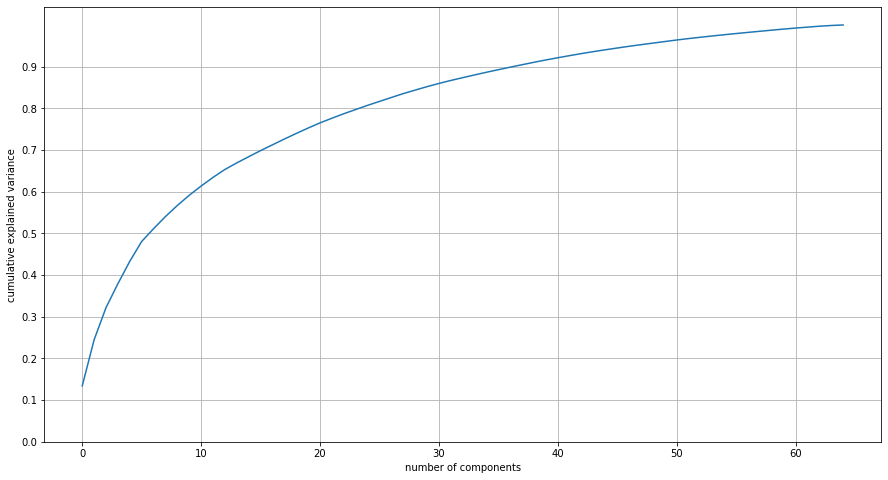

In [40]:
fig = plt.figure(figsize = (15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.yticks(np.arange(0, 1.0, 0.1))
plt.grid()
plt.show()

#### As we can see 40 component explain more than 90% of variance in the data
Hence we consider only those 40 components

In [41]:
pca_final = IncrementalPCA(n_components=40)

df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(20785, 40)

### Correlation matrix

In [42]:
#creating correlation matrix for the principal components we got from pca
corrmat = np.corrcoef(df_train_pca.transpose())

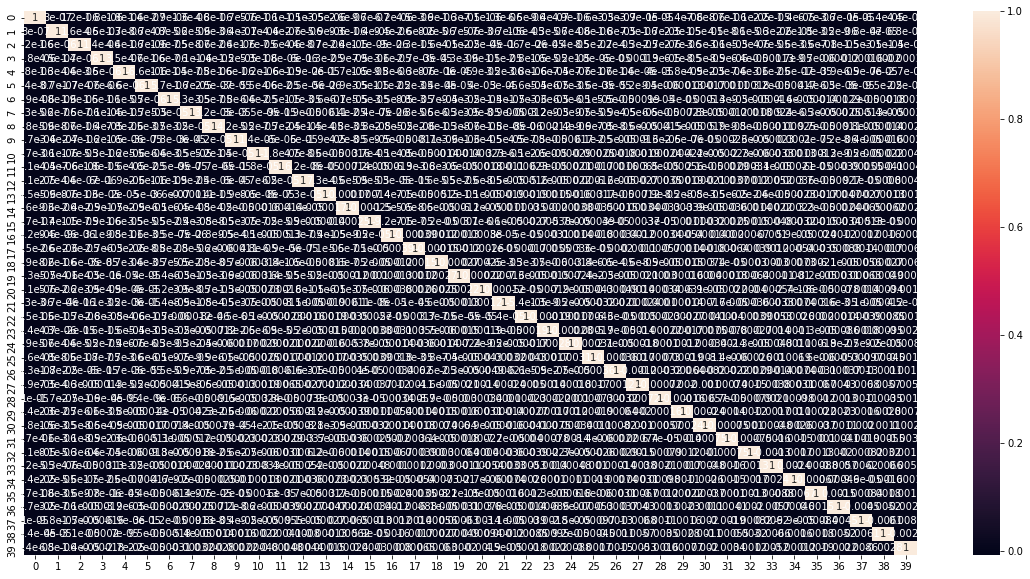

In [43]:
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [44]:
# Leaving the diagonals which have correlation values = 1
# Printing min and max correlation values
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.008628546948044031 , min corr:  -0.006824984123811785


#### Hence, after PCA, the dats doesnot has any alarming level of correlation between the principal features

#### Therefore transforming components of the test data

In [45]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8909, 40)

### Building our Logistic Regression Model using the above derrived PCA features

Since the Data is imbalanced we are using class_weight to balance the data

In [46]:
learner_pca = LogisticRegression(class_weight='balanced') 
model_pca = learner_pca.fit(df_train_pca,y_train)

Making predictions on test data

In [47]:
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.88'

In [48]:
pred_test = model_pca.predict_proba(df_test_pca)
y_pred_default = model_pca.predict(df_test_pca)

print(f"Confusion Matrix  ==> \n {confusion_matrix(y_test,y_pred_default)}")
print(f"\nAccuracy percentage ==> {round(accuracy_score(y_test,y_pred_default) *100, ndigits=2)}%")

Confusion Matrix  ==> 
 [[6616 1556]
 [ 141  596]]

Accuracy percentage ==> 80.95%


In [49]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

#### ROC_AUC score

In [50]:
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8771045984866749


In [51]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

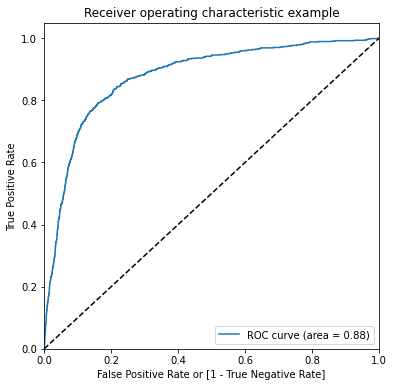

(array([0.        , 0.        , 0.        , ..., 0.99975526, 0.99987763,
        1.        ]),
 array([0.        , 0.00135685, 0.0027137 , ..., 1.        , 1.        ,
        1.        ]),
 array([1.99833555e+00, 9.98335554e-01, 9.96608748e-01, ...,
        7.73425132e-05, 2.27327837e-05, 1.08221200e-05]))

In [52]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

#### Calculating accuracy sensitivity and specificity for various probability cutoffs.

In [53]:
# creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
print(f"{y_pred_final.head()} \n\n")

# calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

   churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      1    0.771230    1    1    1    1    1    1    1    1    0    0
1      0    0.045355    1    0    0    0    0    0    0    0    0    0
2      1    0.209383    1    1    1    0    0    0    0    0    0    0
3      0    0.400730    1    1    1    1    1    0    0    0    0    0
4      0    0.524664    1    1    1    1    1    1    0    0    0    0 


     prob  accuracy     sensi     speci
0.0   0.0  0.082725  0.000000  1.000000
0.1   0.1  0.311820  0.251836  0.976934
0.2   0.2  0.484903  0.442731  0.952510
0.3   0.3  0.625210  0.598262  0.924016
0.4   0.4  0.734987  0.722222  0.876526
0.5   0.5  0.809518  0.809594  0.808684
0.6   0.6  0.864856  0.876163  0.739484
0.7   0.7  0.892693  0.917156  0.621438
0.8   0.8  0.909642  0.949706  0.465400
0.9   0.9  0.917611  0.979564  0.230665


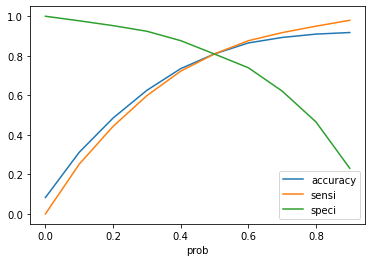

In [54]:
# plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [55]:
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.loc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.49822192625748957]


#### Creating new column for predicted churn value with 1 if Churn_Prob>0.49 else 0

In [56]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)

y_pred_final.churn.value_counts()

0    8172
1     737
Name: churn, dtype: int64

In [57]:
# Confusion matrix 
confusion_mat = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion_mat

array([[6556, 1616],
       [ 136,  601]], dtype=int64)

### Overall Logistic Regression Model Stats, when PCA is used for dimensionalility reduction

In [58]:
TP = confusion_mat[1,1] # true positive 
TN = confusion_mat[0,0] # true negatives
FP = confusion_mat[0,1] # false positives
FN = confusion_mat[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.8095184644741273
Sensitivity:  0.8154681139755766
Specificity:  0.8022515907978464
false postive rate:  0.1977484092021537
positive predictive value:  0.27108705457825893
Negative predictive value:  0.9796772265391512
Misclassification Rate:  0.1966550679088562


The above model have a good level of predictive capibilities, but due to PCA, we can't identify the actual features which have a primary role in churning of a telecom customer in 9th month. 
#### Therefore to identify the actual features which play a significant role in telecom churn, we are now going to create a model withour PCA. This time, we'll be doing Recusrive Feature Elimination(RFE) for selecting our principle components

## LogistcRegression model with RFE

We will be selecting top 10 features using RFE

In [59]:
logreg = LogisticRegression(class_weight='balanced')

In [60]:
rfe = RFE(logreg, 10)
rfe = rfe.fit(X_norm,y)

#Top 10 features according to RFE
col = X_train.columns[rfe.support_]
col

Index(['arpu_6', 'arpu_7', 'arpu_8', 'roam_ic_mou_8', 'loc_og_t2m_mou_6',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8'],
      dtype='object')

In [61]:
# method for calculating VIF
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

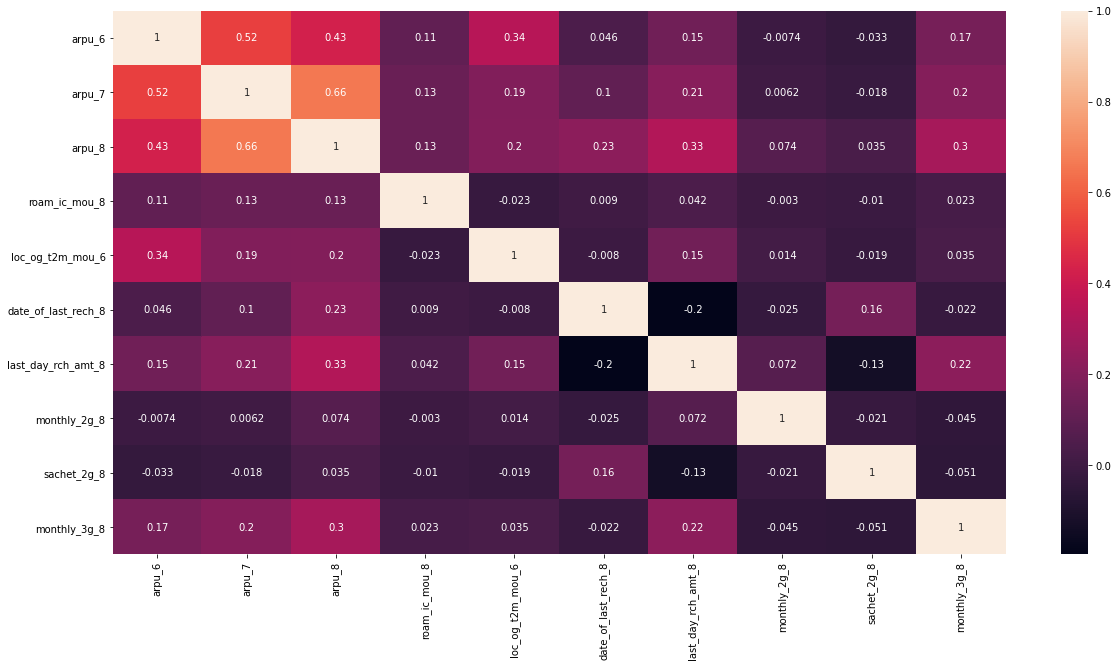

In [62]:
# the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_norm[col].corr(),annot = True)

In [63]:
# The VIF values
def print_vifs(columns):
    col_for_vif = list(columns)
    col_for_vif.append('churn')
    return vif_cal(input_data=telecom_df[col_for_vif], dependent_col='churn')

print_vifs(col)

,Var,Vif
1,arpu_7,7.85
2,arpu_8,6.27
0,arpu_6,5.91
5,date_of_last_rech_8,5.18
6,last_day_rch_amt_8,1.97
4,loc_og_t2m_mou_6,1.96
9,monthly_3g_8,1.26
8,sachet_2g_8,1.19
7,monthly_2g_8,1.12
3,roam_ic_mou_8,1.10


In [64]:
print(col)
# removing arpu_7 due to high VIF, and then looking into vifs again 
col = col.drop(['arpu_7'])
print(col)
print_vifs(col)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'roam_ic_mou_8', 'loc_og_t2m_mou_6',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8'],
      dtype='object')
Index(['arpu_6', 'arpu_8', 'roam_ic_mou_8', 'loc_og_t2m_mou_6',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8'],
      dtype='object')


,Var,Vif
0,arpu_6,5.11
4,date_of_last_rech_8,4.84
1,arpu_8,4.61
5,last_day_rch_amt_8,1.97
3,loc_og_t2m_mou_6,1.96
8,monthly_3g_8,1.25
7,sachet_2g_8,1.19
6,monthly_2g_8,1.12
2,roam_ic_mou_8,1.10


In [65]:
# removing arpu_6 due to high VIF, and then looking into vifs again 
col = col.drop(['arpu_6'])
print(col)
print_vifs(col)

Index(['arpu_8', 'roam_ic_mou_8', 'loc_og_t2m_mou_6', 'date_of_last_rech_8',
       'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8'],
      dtype='object')


,Var,Vif
0,arpu_8,4.15
3,date_of_last_rech_8,3.72
4,last_day_rch_amt_8,1.97
2,loc_og_t2m_mou_6,1.76
7,monthly_3g_8,1.25
6,sachet_2g_8,1.18
5,monthly_2g_8,1.12
1,roam_ic_mou_8,1.09


In [66]:
# Let's run the model using the selected variables
logsk = LogisticRegression(class_weight='balanced')
logsk.fit(X_train[col], y_train)

LogisticRegression(class_weight='balanced')

#### ROC_AUC score

In [67]:
#Making prediction on the test data
pred_probs_test = logsk.predict_proba(X_test[col])[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.86'

In [68]:
#Making prediction on the test data
pred_test = logsk.predict_proba(X_test[col])
y_pred_default = logsk.predict(X_test[col])

print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score : ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.77      0.87      8172
           1       0.25      0.83      0.38       737

    accuracy                           0.78      8909
   macro avg       0.62      0.80      0.62      8909
weighted avg       0.92      0.78      0.83      8909

[[6323 1849]
 [ 123  614]]
accuracy_score :  0.7786508025592098


In [69]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

ROC_AUC Score: 0.8616256589167366


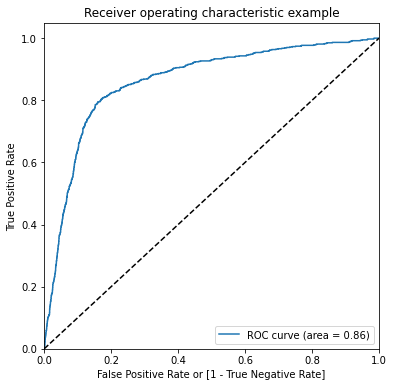

(array([0.00000000e+00, 1.22369065e-04, 1.22369065e-04, ...,
        9.99755262e-01, 9.99877631e-01, 1.00000000e+00]),
 array([0.        , 0.        , 0.00135685, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99237509e+00, 9.92375085e-01, 9.89571374e-01, ...,
        6.73580406e-05, 3.39705051e-05, 1.29667437e-05]))

In [70]:
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print(f'ROC_AUC Score: {roc_auc}')
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [71]:
# creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
print(f"{y_pred_final.head()} \n\n")

# calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

   churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      1    0.740655    1    1    1    1    1    1    1    1    0    0
1      0    0.027533    1    0    0    0    0    0    0    0    0    0
2      1    0.139795    1    1    0    0    0    0    0    0    0    0
3      0    0.521039    1    1    1    1    1    1    0    0    0    0
4      0    0.088141    1    0    0    0    0    0    0    0    0    0 


     prob  accuracy     sensi     speci
0.0   0.0  0.082725  0.000000  1.000000
0.1   0.1  0.280727  0.217939  0.976934
0.2   0.2  0.419351  0.371268  0.952510
0.3   0.3  0.555730  0.522271  0.926730
0.4   0.4  0.673925  0.654797  0.886024
0.5   0.5  0.778651  0.773740  0.833107
0.6   0.6  0.853294  0.862335  0.753053
0.7   0.7  0.885621  0.915932  0.549525
0.8   0.8  0.906499  0.960475  0.308005
0.9   0.9  0.913009  0.985560  0.108548


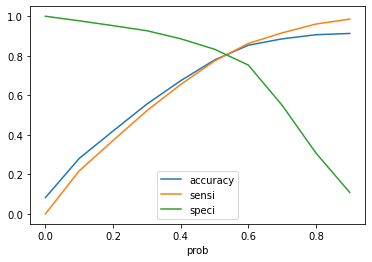

In [72]:
# plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

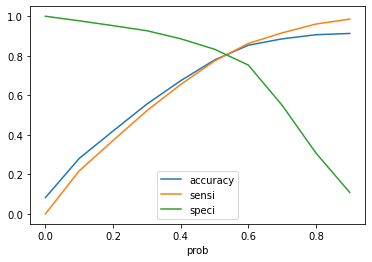

In [73]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [74]:
# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('CutOff threshold: ', threshold)

CutOff threshold:  [0.539757929725879]


#### Creating new column for predicted churn value with 1 if Churn_Prob>0.49 else 0

In [75]:
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)

y_pred_final.churn.value_counts()

0    8172
1     737
Name: churn, dtype: int64

In [76]:
# Confusion matrix 
confusion_mat = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion_mat

array([[6222, 1950],
       [ 115,  622]], dtype=int64)

### Overall Logistic Regression Model Stats, when RFE is used for feature selection

In [77]:
TP = confusion_mat[1,1] # true positive 
TN = confusion_mat[0,0] # true negatives
FP = confusion_mat[0,1] # false positives
FN = confusion_mat[1,0] # false negatives

print('Accuracy Score : ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

Accuracy Score :  0.7786508025592098
Sensitivity:  0.8439620081411127
Specificity:  0.7613803230543319
false postive rate:  0.23861967694566813
positive predictive value:  0.24183514774494558
Negative predictive value:  0.9818526116458892


#### Above Logestic Regression Model gives good accuracy with PCA and RFE
Following are the stats, for a birds eye view:

#### WIth PCA
- Accuracy Score on test data:  0.8095184644741273
- Sensitivity:  0.8154681139755766
- Specificity:  0.8022515907978464
- false postive rate:  0.1977484092021537
- positive predictive value:  0.27108705457825893
- Negative predictive value:  0.9796772265391512
- Misclassification Rate:  0.1966550679088562

#### WIth RFE

- Accuracy Score :  0.7786508025592098
- Sensitivity: 0.8439620081411127
- Specificity: 0.7613803230543319
- false postive rate:  0.23861967694566813
- positive predictive value:  0.24183514774494558
- Negative predictive value: 0.9818526116458892

## Buliding the model using Random Forest with PCA

##### NOTE:
We already did do our data treatment using PCA and itentified the principle features, while we were building our Logistic Regression Model. We'll be using the same data to train our Random Forest Classifier

In [78]:
model_rf = RandomForestClassifier()
model_rf.fit(df_train_pca,y_train)

# Make predictions
prediction_test = model_rf.predict(df_test_pca)
print ('Random Forest Accuracy with Default Hyperparameter',metrics.accuracy_score(y_test, prediction_test))

Random Forest Accuracy with Default Hyperparameter 0.9215400157144461


In [79]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8172
           1       0.69      0.09      0.17       737

    accuracy                           0.92      8909
   macro avg       0.81      0.55      0.56      8909
weighted avg       0.90      0.92      0.89      8909



In [80]:
# Confusion matrix
confusion_matrix(y_test, prediction_test)

array([[8140,   32],
       [ 667,   70]], dtype=int64)

#### Tuning the estimators for random forest

In [81]:
# GridSearchCV to find optimal maximum depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 25, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(df_train_pca,y_train )

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': range(2, 25, 5)}, return_train_score=True,
             scoring='accuracy')

  plotting accuracies for optimal maximum depth

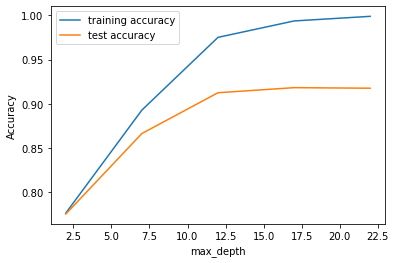

In [82]:
scores = rf.cv_results_

plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [83]:
rf_best = rf.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=17)

In [84]:
#GridSearchCV to find the n_estimators
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1200, 400)}

# instantiate the model
#here we are mentioninig the maximimum required depth
rf = RandomForestClassifier(max_depth=10,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(df_train_pca,y_train )

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             param_grid={'n_estimators': range(100, 1200, 400)},
             return_train_score=True, scoring='accuracy')

  plotting accuracies for optimal n_estimators

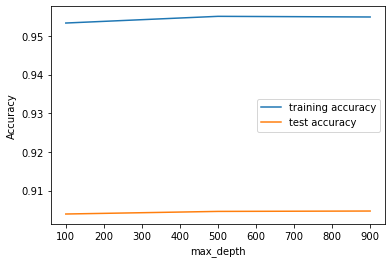

In [85]:
scores = rf.cv_results_

# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [86]:
#GridSearchCV to find the min_samples_leaf
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the rf model
rf = RandomForestClassifier(criterion = "gini",class_weight='balanced',random_state = 100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(df_train_pca,y_train )

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

 plotting accuracies for optimal min_samples_leaf

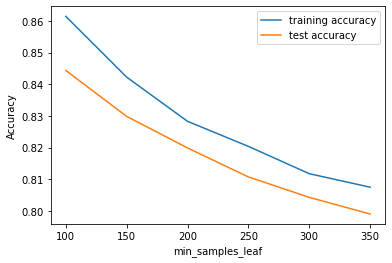

In [87]:
scores = rf.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [88]:
#GridSearchCV to find the min_samples_split
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 400, 50)}

# instantiate the model
#here we are mentioninig the maximimum required depth
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True
               )
rf.fit(df_train_pca,y_train )

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'min_samples_split': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [89]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.595929,0.416897,0.053088,0.005917,100,{'min_samples_split': 100},0.896319,0.892711,0.895838,0.898725,...,0.895213,0.002355,1,0.934027,0.934508,0.934087,0.933726,0.934749,0.934219,0.000364
1,5.692634,0.040047,0.050170,0.006163,150,{'min_samples_split': 150},0.880202,0.878518,0.878759,0.881886,...,0.879144,0.001842,2,0.908468,0.911835,0.912377,0.913279,0.911234,0.911439,0.001630
2,5.579225,0.130731,0.046864,0.000001,200,{'min_samples_split': 200},0.868174,0.867693,0.868174,0.870099,...,0.867597,0.002050,3,0.893553,0.896500,0.892952,0.894756,0.893673,0.894287,0.001250
3,5.732721,0.253561,0.047758,0.000465,250,{'min_samples_split': 250},0.861198,0.855184,0.859033,0.855425,...,0.856964,0.002707,4,0.877315,0.881886,0.881946,0.878638,0.880743,0.880106,0.001839
4,5.279094,0.279448,0.046172,0.003112,300,{'min_samples_split': 300},0.857349,0.850132,0.847486,0.851335,...,0.850421,0.003971,5,0.868054,0.872444,0.866791,0.868836,0.871301,0.869485,0.002087


plotting accuracies with min_samples_split

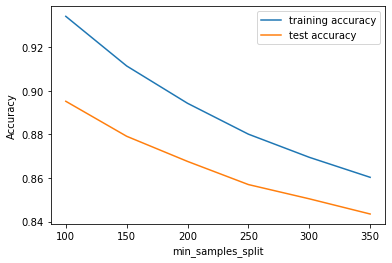

In [90]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Creating a parameter grid on the above used parameters

In [91]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100),
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 5, n_jobs=-1, verbose = 1)

In [92]:
# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.7min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10],
                         'min_samples_leaf': range(100, 200, 100),
                         'min_samples_split': range(200, 400, 100),
                         'n_estimators': range(200, 400, 100)},
             refit='recall_score', verbose=1)

In [93]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8469569401010345 using {'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [94]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             n_estimators=200)

In [95]:
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=100, min_samples_split=200,
                       n_estimators=200)

In [96]:
# predict
y_pred_default = rfc.predict(df_test_pca)

In [97]:
#printing the classification report
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score:  ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      8172
           1       0.31      0.70      0.43       737

    accuracy                           0.85      8909
   macro avg       0.64      0.78      0.67      8909
weighted avg       0.92      0.85      0.87      8909

[[7042 1130]
 [ 220  517]]
accuracy_score:   0.8484678415085868


In [98]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[7042, 1130],
       [ 220,  517]], dtype=int64)

In [99]:
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

print('Accuracy Score:  ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:   0.8484678415085868
Sensitivity:  0.7014925373134329
Specificity:  0.8617229564366128
false postive rate:  0.1382770435633872
positive predictive value:  0.31390406800242865
Negative predictive value:  0.9697053153401267
Misclassification Rate:  0.1515321584914132


## Building  Random Forest classifier without PCA on all the features

In [100]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

In [101]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [102]:
# Making predictions
predictions = rfc.predict(X_test)

In [103]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8172
           1       0.74      0.40      0.52       737

    accuracy                           0.94      8909
   macro avg       0.84      0.70      0.74      8909
weighted avg       0.93      0.94      0.93      8909

[[8068  104]
 [ 440  297]]
0.9389381524301268


In [104]:
# Confusion Matrix
confusion_rf_with_all_feature=confusion_matrix(y_test,predictions)
confusion_rf_with_all_feature

array([[8068,  104],
       [ 440,  297]], dtype=int64)

In [105]:
TN = confusion_rf_with_all_feature[0,0] # true positive 
TP = confusion_rf_with_all_feature[1,1] # true negatives
FP = confusion_rf_with_all_feature[0,1] # false positives
FN = confusion_rf_with_all_feature[1,0] # false negatives

print('Accuracy Score: ', accuracy_score(y_test,predictions))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:  0.9389381524301268
Sensitivity:  0.40298507462686567
Specificity:  0.9872736172295644
false postive rate:  0.012726382770435633
positive predictive value:  0.7406483790523691
Negative predictive value:  0.9482839680300893
Misclassification Rate:  0.061061847569873165


### Tuning the hyperparameter

In [106]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)

In [107]:
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

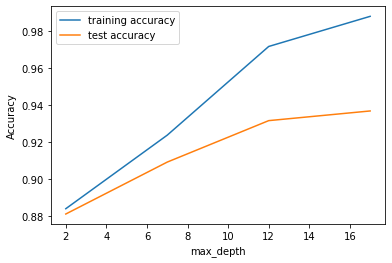

In [108]:
scores = rf.cv_results_
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [109]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1000, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             param_grid={'n_estimators': range(100, 1000, 400)},
             return_train_score=True, scoring='accuracy')

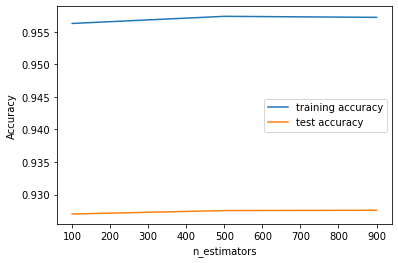

In [110]:
scores = rf.cv_results_
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [111]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

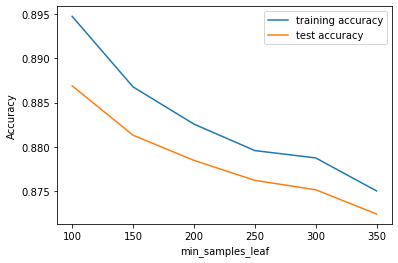

In [112]:
scores = rf.cv_results_
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [113]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 700, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'min_samples_split': range(100, 700, 50)},
             return_train_score=True, scoring='accuracy')

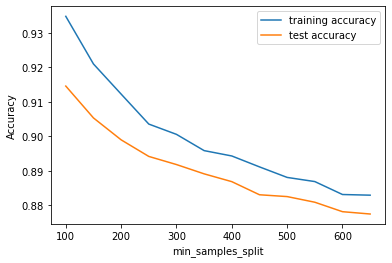

In [114]:
scores = rf.cv_results_
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [115]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,12],
    'min_samples_leaf': range(150, 250, 50),
    'min_samples_split': range(100, 700, 50),
    'n_estimators': [300,400,500]
  
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 3, verbose = 1, n_jobs=-1)

In [116]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 18.4min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [10, 12],
                         'min_samples_leaf': range(150, 250, 50),
                         'min_samples_split': range(100, 700, 50),
                         'n_estimators': [300, 400, 500]},
             refit='recall_score', verbose=1)

In [117]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8842917595614864 using {'max_depth': 10, 'min_samples_leaf': 150, 'min_samples_split': 250, 'n_estimators': 300}


In [118]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc_final = RandomForestClassifier(bootstrap=True,class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=150, 
                             min_samples_split=300,
                             n_estimators=500)

In [119]:
# fit
rfc_final.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=150, min_samples_split=300,
                       n_estimators=500)

In [120]:
# predict
predictions = rfc_final.predict(X_test)

In [121]:
from sklearn import metrics
confusion_rm_f = metrics.confusion_matrix( y_test, predictions )
confusion_rm_f

array([[7299,  873],
       [ 145,  592]], dtype=int64)

In [122]:
TN = confusion_rm_f[0,0] # true positive 
TP = confusion_rm_f[1,1] # true negatives
FP = confusion_rm_f[0,1] # false positives
FN = confusion_rm_f[1,0] # false negatives

print('Accuracy Score: ',accuracy_score(y_test,predictions))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:  0.8857335278931417
Sensitivity:  0.8032564450474898
Specificity:  0.8931718061674009
false postive rate:  0.10682819383259912
positive predictive value:  0.4040955631399317
Negative predictive value:  0.9805212251477701
Misclassification Rate:  0.11426647210685824


Random Forest Model with All feature gives us 88% of Accuracy and 80% of sensitivity 

#### Finding the Imortant variables

In [123]:
#finding the important features
importances =rfc_final.feature_importances_
col_names =  X.columns

#sorting the feautures in descending order to get top features
sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

,colName,value
0,0.203845,arpu_8
1,0.179327,last_day_rch_amt_8
2,0.122457,max_rech_amt_8
3,0.106388,roam_ic_mou_8
4,0.075580,date_of_last_rech_8
...,...,...
60,0.000090,sachet_2g_6
61,0.000056,sachet_3g_8
62,0.000035,sachet_3g_6
63,0.000019,sachet_3g_7


#### Plotting the top 30 features from the model

<Figure size 1440x216 with 0 Axes>

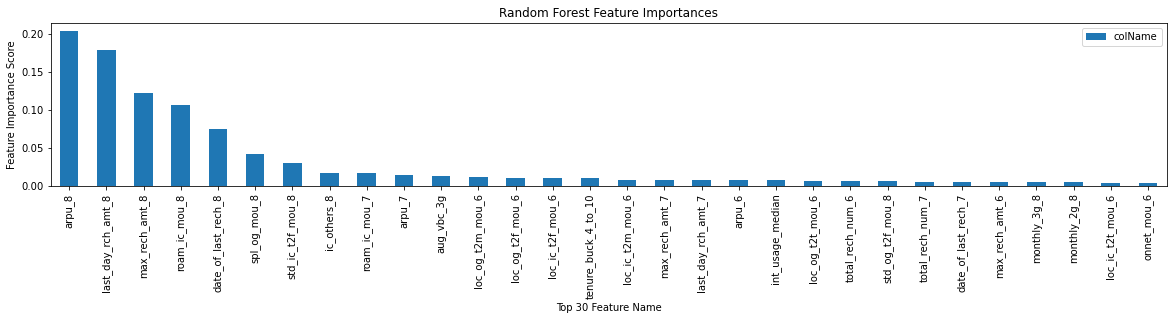

In [125]:
plt.clf()
from pylab import rcParams
rcParams['figure.figsize'] = 20, 3
sorted_feature_importance[0:30].plot(x='value', y='colName' , kind='bar', title='Random Forest Feature Importances')
plt.ylabel('Feature Importance Score')
plt.xlabel('Top 30 Feature Name')

plt.show()

Getting the Top 5 feautures

In [126]:
sorted_feature_importance.head(10)

,colName,value
0,0.203845,arpu_8
1,0.179327,last_day_rch_amt_8
2,0.122457,max_rech_amt_8
3,0.106388,roam_ic_mou_8
4,0.075580,date_of_last_rech_8
5,0.042479,spl_og_mou_8
6,0.029994,std_ic_t2f_mou_8
7,0.017220,ic_others_8
8,0.016936,roam_ic_mou_7
9,0.014459,arpu_7


Text(0, 0.5, 'Average Volume based cost for 3G')

<Figure size 1080x648 with 0 Axes>

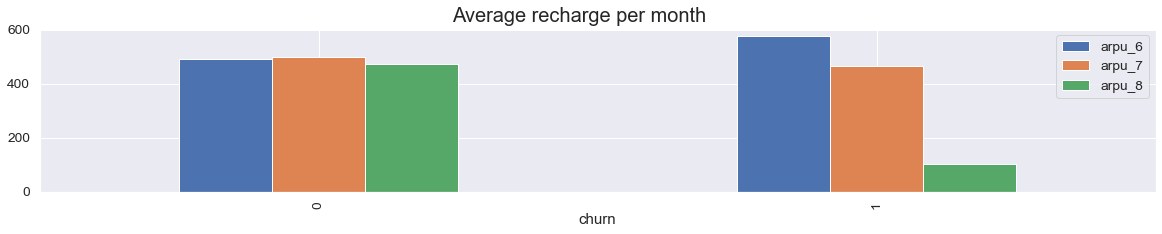

<Figure size 1080x648 with 0 Axes>

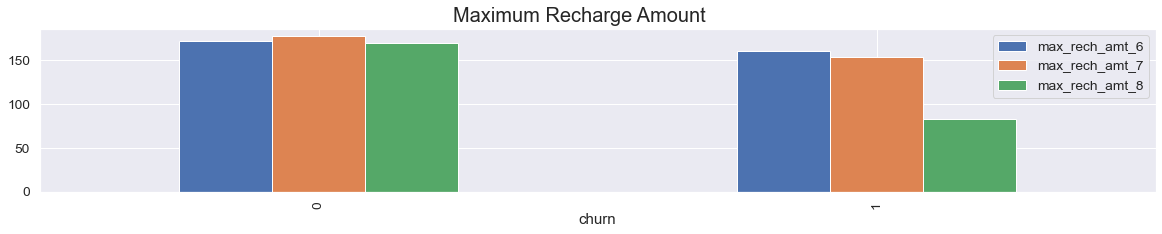

<Figure size 1080x648 with 0 Axes>

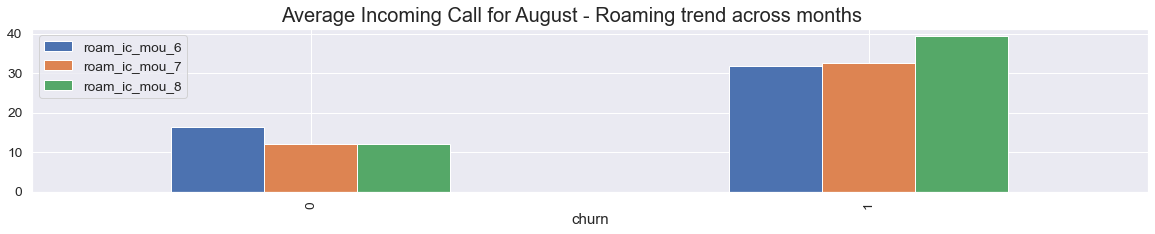

<Figure size 1080x648 with 0 Axes>

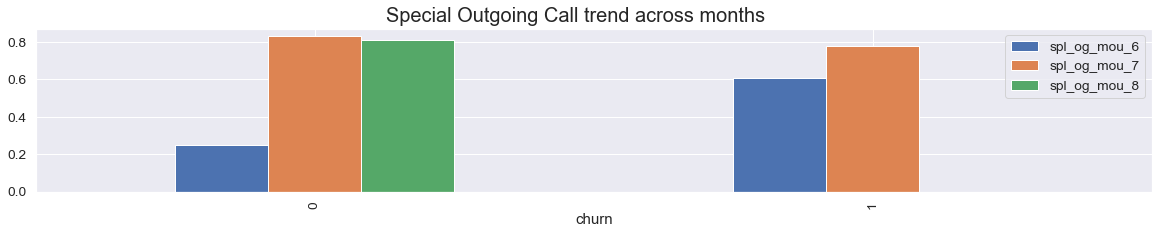

<Figure size 1080x648 with 0 Axes>

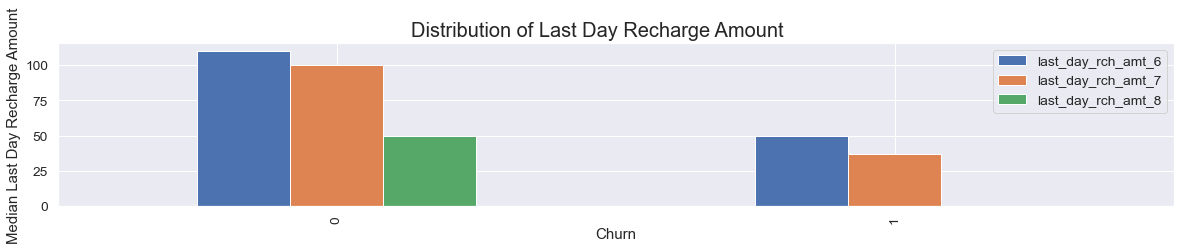

<Figure size 1080x648 with 0 Axes>

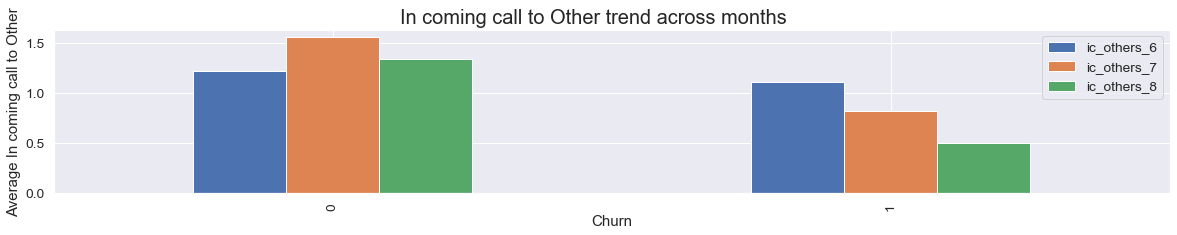

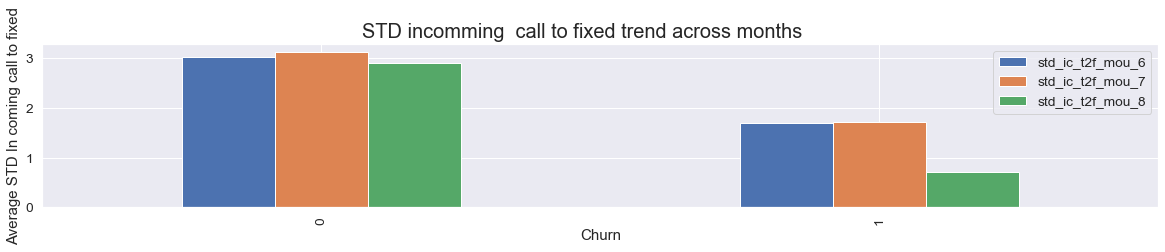

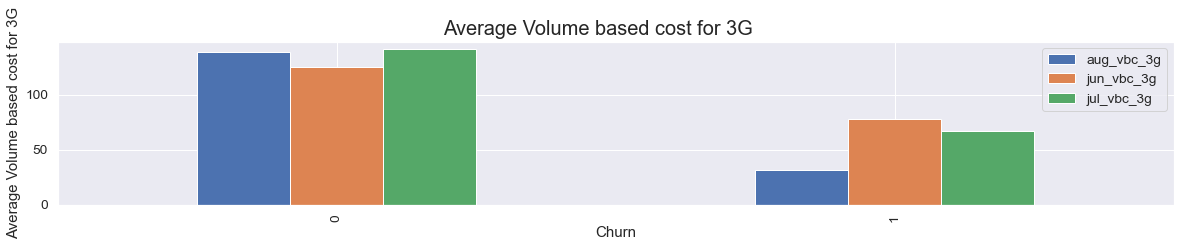

In [127]:
df1['churn'] = df1['churn'].astype('object', copy = False)
df_sample = df1.groupby(['churn'])['arpu_6', 'arpu_7', 'arpu_8'].median()

sns.set(font_scale=1.25)
plt.figure(figsize=(15, 9))
df_sample.plot.bar()
plt.suptitle('Average recharge per month', fontsize=20)

    
df_sample = df1.groupby(['churn'])['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8'].mean()
 
sns.set(font_scale=1.25)
plt.figure(figsize=(15, 9))
df_sample.plot.bar()
plt.suptitle('Maximum Recharge Amount', fontsize=20)
    
df_sample = df1.groupby(['churn'])['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8'].mean()

sns.set(font_scale=1.25)
plt.figure(figsize=(15, 9))
df_sample.plot.bar()
plt.suptitle('Average Incoming Call for August - Roaming trend across months', fontsize=20)

df_sample = df1.groupby(['churn'])['spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8'].median()

sns.set(font_scale=1.25)
plt.figure(figsize=(15, 9))
df_sample.plot.bar()
plt.suptitle('Special Outgoing Call trend across months', fontsize=20)

df_sample = df1.groupby(['churn'])['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8'].median()
sns.set(font_scale=1.25)
plt.figure(figsize=(15, 9))
df_sample.plot.bar()
plt.suptitle('Distribution of Last Day Recharge Amount', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Median Last Day Recharge Amount")

df_sample = df1.groupby(['churn'])['ic_others_6', 'ic_others_7', 'ic_others_8'].mean()
sns.set(font_scale=1.25)
plt.figure(figsize=(15, 9))
df_sample.plot.bar()
plt.suptitle('In coming call to Other trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average In coming call to Other")



df_sample = df1.groupby(['churn'])['std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('STD incomming  call to fixed trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average STD In coming call to fixed")


df_sample = df1.groupby(['churn'])['aug_vbc_3g', 'jun_vbc_3g', 'jul_vbc_3g'].mean()
df_sample.plot.bar()
plt.suptitle('Average Volume based cost for 3G', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average Volume based cost for 3G")

# Conclusion of the study

#### After training both Logestic Reression and Random forest models.

The insights from the models are :

- Logestic Regression is the best model for interpretation with highest sensitivity of 83%(with RFE) and 81%(with PCA)
- Random forest is the best model for prediction with highest accuracy of 84%


#### Logestic Regression 
1)With PCA
- Accuracy Score : 0.8095184644741273
- Sensitivity Score : 0.8154681139755766

2)With RFE (Without PCA)
- Accuracy Score :  0.7786508025592098
- Sensitivity: 0.8439620081411127

#### Random Forest
1)With PCA
- Accuracy Score : 0.8495903019418566
- Sensitivity Score : 0.7069199457259159

2)Without PCA
- Accuracy Score :  0.88651925010964306
- Sensitivity: 0.8100407055630936

### Top features (found via `Without PCA` modeling)
1) Top features found via RFE and Logistic Regression

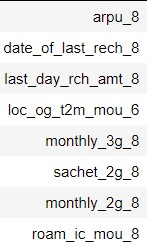

2)Top features found via Random Forest without PCA
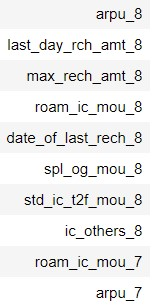